<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/TensorFlow5_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt -O /content/text.txt

--2020-04-09 12:35:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 2404:6800:4003:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/content/text.txt’

/content/text.txt   100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-04-09 12:35:55 (163 MB/s) - ‘/content/text.txt’ saved [68970/68970]



In [3]:
data= open('/content/text.txt').readlines()
print(data[12])

And stole my bunch of thyme away



In [4]:
token= Tokenizer()
token.fit_on_texts(data)
total= len(token.word_index)+1
print(total)

2690


In [0]:
import numpy as np

input_sentence=[]
for line in data:
  token_list= token.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence= token_list[:i+1]
    input_sentence.append(n_gram_sequence)

max_sequence_length= max([len(x) for x in input_sentence])

input_sequence= np.array(pad_sequences( input_sentence, maxlen= max_sequence_length, padding='pre'))

In [0]:
xs= input_sequence[:,:-1]
labels= input_sequence[:,-1]

#one hot encoding
ys= tf.keras.utils.to_categorical(labels, num_classes=total)

In [7]:
from tensorflow.keras.optimizers import Adam
#model building
model= tf.keras.Sequential([
                            tf.keras.layers.Embedding(total, 16, input_length=max_sequence_length-1),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                            tf.keras.layers.Dense(total, activation='softmax')
])
adam= Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 16)            43040     
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 64)            12544     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense (Dense)                (None, 2690)              88770     
Total params: 154,722
Trainable params: 154,722
Non-trainable params: 0
_________________________________________________________________


In [8]:
history= model.fit(xs,ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 4s 10ms/step - loss: 6.7485 - accuracy: 0.0640
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 6.2268 - accuracy: 0.0750
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 5.9759 - accuracy: 0.0953
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 5.7531 - accuracy: 0.1048
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 5.5613 - accuracy: 0.1121
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 5.3905 - accuracy: 0.1238
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 5.2364 - accuracy: 0.1337
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 5.1056 - accuracy: 0.1400
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 4.9731 - accuracy: 0.1482
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 4.843

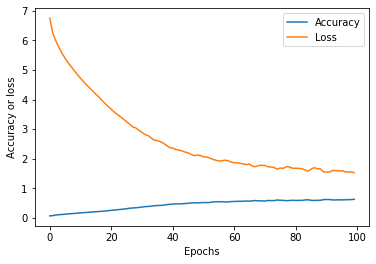

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy or loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [10]:
seed_text='Utkarsh Lives in India'
for _ in range(50):
  token_list= token.texts_to_sequences([seed_text])[0]
  token_list= pad_sequences([token_list], maxlen= max_sequence_length-1, padding='pre')
  predict= model.predict_classes(token_list, verbose=0)
  for word, index in token.word_index.items():
    if index== predict:
      output_word= word
      break
  seed_text+=' '+ output_word

print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Utkarsh Lives in India my heart my true love they they sat to do you you say now how rings rings rest do we died so glen im rest to save me in black away oer your bower oer the hurley or now into i meet to the bower oer the name of now
